<a href="https://colab.research.google.com/github/t-tsue/public/blob/main/PBL02_image_cropping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google Driveに接続できるdriveというモジュールをgoogle.colabというライブラリからインポートする。
from google.colab import drive

# Google Driveにマウント（接続）する。これにより、Colab上でGoogle Drive内のファイルにアクセスできるようになる。
drive.mount('/content/drive')

DIR='/content/drive/My Drive/DXQuest_PBL02/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import glob
import pandas as pd
import cv2

train_files = sorted(glob.glob(os.path.join(DIR,'train', '*/*.jpeg')))
test_files = sorted(glob.glob(os.path.join(DIR,'test', '*.jpeg')))

train_df = pd.DataFrame(train_files, columns=['file_name'])
test_df = pd.DataFrame(test_files, columns=['file_name'])

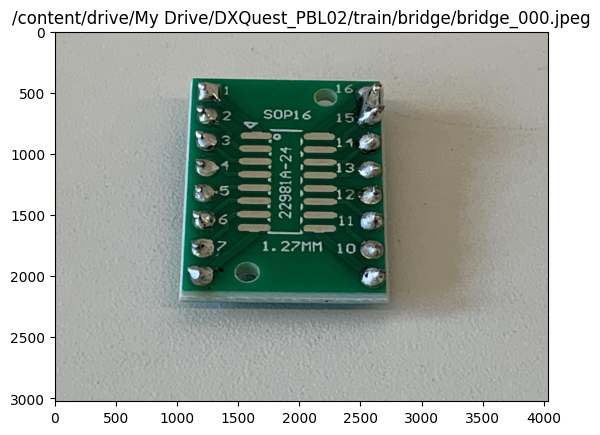

In [3]:
img = cv2.imread(train_files[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title(train_files[0])
plt.imshow(img)


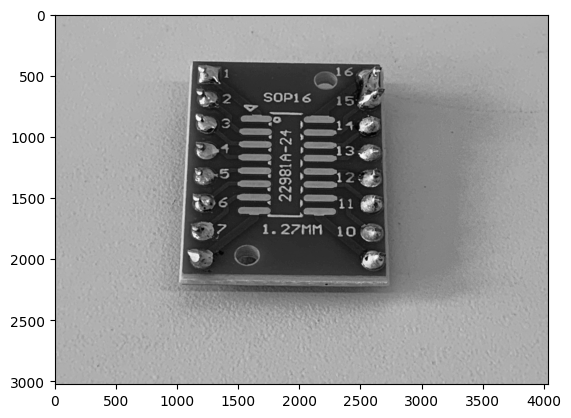

In [4]:
img = cv2.imread(train_files[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')


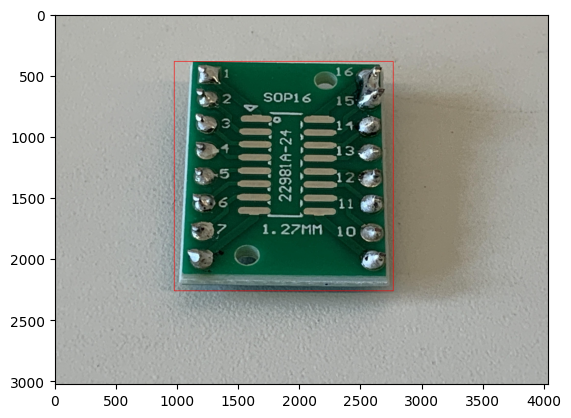

In [5]:
img = cv2.imread(train_files[0])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.threshold(gray, 90, 100, cv2.THRESH_BINARY)[1]
contours = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
x1 = [] #x座標の最小値
y1 = [] #y座標の最小値
x2 = [] #x座標の最大値
y2 = [] #y座標の最大値
for i in range(1, len(contours)):# i = 1 は画像全体の外枠になるのでカウントに入れない
  ret = cv2.boundingRect(contours[i])
  x1.append(ret[0])
  y1.append(ret[1])
  x2.append(ret[0] + ret[2])
  y2.append(ret[1] + ret[3])

# 輪郭の一番外枠を切り抜き
x1_min = min(x1)
y1_min = min(y1)
x2_max = max(x2)
x2_max = np.quantile(x2,0.99).astype(int)
y2_max = np.quantile(y2,0.98).astype(int)
cv2.rectangle(img, (x1_min, y1_min), (x2_max, y2_max), (255, 0, 0), 3)

crop_img = img[y1_min:y2_max, x1_min:x2_max]
plt.imshow(img)

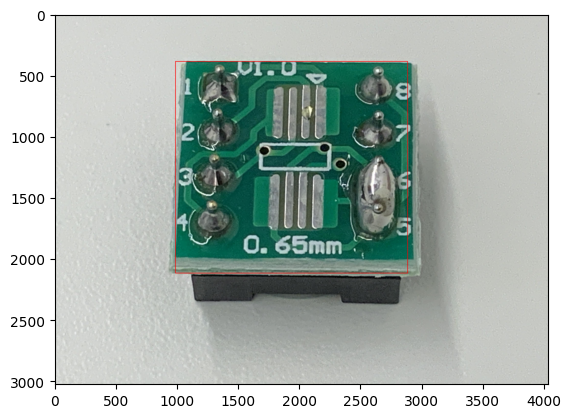

In [6]:
img = cv2.imread(train_files[1])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.threshold(gray, 90, 100, cv2.THRESH_BINARY)[1]
contours = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
x1 = [] #x座標の最小値
y1 = [] #y座標の最小値
x2 = [] #x座標の最大値
y2 = [] #y座標の最大値
for i in range(1, len(contours)):# i = 1 は画像全体の外枠になるのでカウントに入れない
  ret = cv2.boundingRect(contours[i])
  x1.append(ret[0])
  y1.append(ret[1])
  x2.append(ret[0] + ret[2])
  y2.append(ret[1] + ret[3])

# 輪郭の一番外枠を切り抜き
x1_min = min(x1)
y1_min = min(y1)
x2_max = np.quantile(x2,0.98).astype(int)
y2_max = np.quantile(y2,0.98).astype(int)
cv2.rectangle(img, (x1_min, y1_min), (x2_max, y2_max), (255, 0, 0), 3)

crop_img = img[y1_min:y2_max, x1_min:x2_max]
plt.imshow(img)

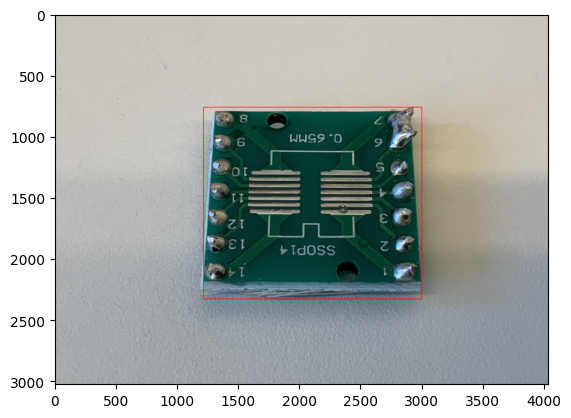

In [7]:
img = cv2.imread(train_files[2])
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img2 = cv2.threshold(gray, 90, 100, cv2.THRESH_BINARY)[1]
contours = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
x1 = [] #x座標の最小値
y1 = [] #y座標の最小値
x2 = [] #x座標の最大値
y2 = [] #y座標の最大値
for i in range(1, len(contours)):# i = 1 は画像全体の外枠になるのでカウントに入れない
  ret = cv2.boundingRect(contours[i])
  x1.append(ret[0])
  y1.append(ret[1])
  x2.append(ret[0] + ret[2])
  y2.append(ret[1] + ret[3])

# 輪郭の一番外枠を切り抜き
x1_min = min(x1)
y1_min = min(y1)
x2_max = np.quantile(x2,0.98).astype(int)
y2_max = np.quantile(y2,0.98).astype(int)
cv2.rectangle(img, (x1_min, y1_min), (x2_max, y2_max), (255, 0, 0), 3)

crop_img = img[y1_min:y2_max, x1_min:x2_max]
plt.imshow(img)

In [8]:
def get_image_filename(key):
  return train_df[train_df['file_name'].str.contains(key)].file_name.values[0]

get_image_filename('potato_004')

'/content/drive/My Drive/DXQuest_PBL02/train/potato/potato_004.jpeg'

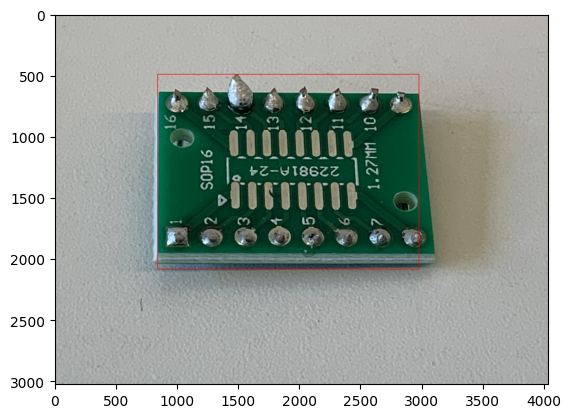

In [9]:
img = cv2.imread(get_image_filename('potato_004'))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img2 = cv2.threshold(gray, 90, 100, cv2.THRESH_BINARY)[1]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

contours = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
x1 = [] #x座標の最小値
y1 = [] #y座標の最小値
x2 = [] #x座標の最大値
y2 = [] #y座標の最大値
for i in range(1, len(contours)):# i = 1 は画像全体の外枠になるのでカウントに入れない
  ret = cv2.boundingRect(contours[i])
  x1.append(ret[0])
  y1.append(ret[1])
  x2.append(ret[0] + ret[2])
  y2.append(ret[1] + ret[3])

# 輪郭の一番外枠を切り抜き
x1_min = min(x1)
y1_min = min(y1)
x2_max = np.quantile(x2,0.98).astype(int)
y2_max = np.quantile(y2,0.98).astype(int)
cv2.rectangle(img, (x1_min, y1_min), (x2_max, y2_max), (255, 0, 0), 3)

crop_img = img[y1_min:y2_max, x1_min:x2_max]
plt.imshow(img)

In [10]:
def crop(image_file,buffer=20):
  img = cv2.imread(image_file)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  img2 = cv2.threshold(gray, 90, 100, cv2.THRESH_BINARY)[1]
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

  contours = cv2.findContours(img2, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)[0]
  x1 = [] #x座標の最小値
  y1 = [] #y座標の最小値
  x2 = [] #x座標の最大値
  y2 = [] #y座標の最大値
  for i in range(1, len(contours)):# i = 1 は画像全体の外枠になるのでカウントに入れない
    ret = cv2.boundingRect(contours[i])
    x1.append(ret[0])
    y1.append(ret[1])
    x2.append(ret[0] + ret[2])
    y2.append(ret[1] + ret[3])

  # 輪郭の一番外枠を切り抜き
  x1_min = min(x1)
  y1_min = min(y1)
  x2_max = np.quantile(x2,0.98).astype(int)
  y2_max = np.quantile(y2,0.98).astype(int)
  return x1_min - buffer, y1_min - buffer, x2_max + buffer, y2_max + buffer


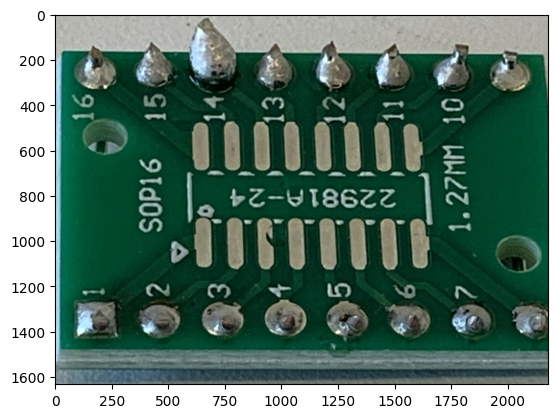

In [11]:
img = cv2.imread(get_image_filename('potato_004'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image_file=get_image_filename('potato_004')
x1, y1, x2, y2 = crop(image_file)
crop_img = img[y1:y2, x1:x2]
plt.imshow(crop_img)

In [12]:
def save_crop_image(files, outdir, subdir):
  for file in files:
    if subdir == True:
      subdir_name = os.path.basename(os.path.dirname(file))
    else:
      subdir_name = ''

    x1, y1, x2, y2 = crop(file,buffer=50)
    save_file = os.path.join(outdir, subdir_name, os.path.basename(file))
    os.makedirs(os.path.dirname(save_file), exist_ok=True)
    with Image.open(file) as img:
      cropped = img.crop((x1, y1, x2, y2))
      img.paste((0,0,0), (0,0,img.width,img.height))
      x = img.width - cropped.width
      y = img.height - cropped.height
      img.paste(cropped, (x//2, y//2))
      img.save(save_file)
  return

outdir = os.path.join(DIR,'train_crop')
save_crop_image(train_files, outdir, subdir=True)


In [13]:
outdir = os.path.join(DIR,'test_crop')
save_crop_image(test_files, outdir, subdir=False)